<a href="https://colab.research.google.com/github/fabianalvarez7/Programacion-1/blob/main/Programacion1_Proyecto_final_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL**
# **FACULTAD DE CIENCIAS EXACTAS, INGENIERÍA Y AGRIMENSURA**
# **UNIVERSIDAD NACIONAL DE ROSARIO**
# PROGRAMACIÓN I - PROYECTO FINAL 2022





# Comisión 2

# Alumno: Gustavo Alvarez

# Legajo: A-4501/2

# Grupo: Toronto









# Consigna

Se pide elaborar un informe sobre los hospedajes turísticos en una ciudad a elección usando los datos que ofrece la página web de Airbnb. La ciudad seleccionada es Toronto. Se busca conseguir la siguiente información:

* Hospedaje más costoso y más económico por cada barrio de Toronto.   

# Estructuras de datos

La página web de Airbnb deja a disposición la información actualizada sobre los hospedajes en formato csv (valores separados por comas).
Para cargar los datos del archivo .csv se utiliza el lenguaje de programación Python mediante el intérprete de Google Colaboratory. La información se va a estructurar usando listas de diccionarios, donde cada diccionario almacena los datos necesarios de cada barrio.

# Carga de datos

In [ ]:
#Se importan los módulos necesarios para descargar la url y leer el archivo csv
#Se importa la librería para realizar los gráficos
import csv
import requests
import matplotlib.pyplot as plt

def descargar_csv(url, archivo_salida):
    print("Descargando archivo...")

    #Se hace la petición mediante el módulo requests para guardarla en un archivo csv
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")

    #Se abre la conexion en modo escritura
    #El context manager (with) la cerrará automáticamente
    with open(archivo_salida, "w", encoding="utf-8") as archivo:

        #Se escribe el contenido de la consulta
        archivo.write(contenido.decode("utf-8"))

    print("¡Archivo descargado con éxito!")

In [ ]:
def leer_csv(ruta_archivo, campos):

    #Se crea una lista vacía que va a contener los diccionarios
    datos = []
    #Se crea una lista para guardar los nombres de las columnas
    columnas = None

    #Se abre la conexión en modo lectura
    #El context manager (with) la cerrará automáticamente
    with open(ruta_archivo, mode="r") as archivo:

        #Se crea un obeto iterable
        lector = csv.reader(archivo)

        #Se recorre a través de los índices y las filas con enumerate()
        for i, fila in enumerate(lector):
            if i == 0: #Si es la primera fila, se guarda en la lista "columnas"
                columnas = fila
            else:
                entrada = {} #si no, se crea un diccionario

                #Se itera con zip() para vincular los nombres de las columnas
                #y los valores de cada fila
                for columna, valor in zip(columnas, fila):
                    if columna in campos:
                        entrada[columna] =  valor
                datos.append(entrada) #se agregan los diccionarios a la lista
    return datos

In [ ]:
url = "http://data.insideairbnb.com/canada/on/toronto/2022-06-05/data/listings.csv"

#Se llama a la función para descargar el archivo csv desde la url
descargar_csv(url, "listings.csv")

Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


In [ ]:
#Columnas necesarias para responder la consigna
columnas = ["neighbourhood", "price"]

#Se guarda la salida de la función leer_csv en la variable "datos" para usarse después
datos = leer_csv("listings.csv", columnas)
datos[:10]

[{'neighbourhood': 'Toronto, Ontario, Canada', 'price': '$469.00'},
 {'neighbourhood': '', 'price': '$94.00'},
 {'neighbourhood': '', 'price': '$45.00'},
 {'neighbourhood': '', 'price': '$126.00'},
 {'neighbourhood': 'Toronto, Ontario, Canada', 'price': '$100.00'},
 {'neighbourhood': 'Toronto, Ontario, Canada', 'price': '$145.00'},
 {'neighbourhood': 'Toronto, Ontario, Canada', 'price': '$100.00'},
 {'neighbourhood': 'Toronto, Ontario, Canada', 'price': '$119.00'},
 {'neighbourhood': '', 'price': '$130.00'},
 {'neighbourhood': 'Toronto, Ontario, Canada', 'price': '$115.00'}]

Este es el archivo completo donde aparecen todas las entradas de las publicaciones hechas en la web de Airbnb. Solo se muestran el barrio y el precio de esa publicación. Por supuesto los barrios se repiten, por eso en el siguiente paso se van a filtrar esos datos para organizarlos.

# Clasificación de los hospedajes por barrio

In [ ]:
def precios_por_barrio(datos):
 #Esta función arma un diccionario con los nombres de los barrios como claves
 #y una lista con los precios de los hospedajes como valores

    precios_por_barrio = {}
    for fila in datos:
        barrio = fila["neighbourhood"]
        precio = float(fila["price"].replace("$","").replace(",",""))
        if barrio not in precios_por_barrio:
            precios_por_barrio[barrio] = []
        precios_por_barrio[barrio].append(precio)

    return precios_por_barrio

In [ ]:
#Se ejecuta la función 1:
resultado1 = precios_por_barrio(datos)
resultado1

{'': [94.0,
  45.0,
  126.0,
  130.0,
  126.0,
  79.0,
  80.0,
  90.0,
  450.0,
  37.0,
  64.0,
  37.0,
  45.0,
  45.0,
  100.0,
  300.0,
  80.0,
  48.0,
  60.0,
  160.0,
  210.0,
  67.0,
  225.0,
  227.0,
  150.0,
  65.0,
  67.0,
  100.0,
  159.0,
  80.0,
  58.0,
  111.0,
  65.0,
  80.0,
  66.0,
  199.0,
  135.0,
  250.0,
  45.0,
  139.0,
  85.0,
  90.0,
  178.0,
  72.0,
  150.0,
  115.0,
  167.0,
  80.0,
  214.0,
  172.0,
  140.0,
  152.0,
  25.0,
  361.0,
  151.0,
  50.0,
  450.0,
  85.0,
  45.0,
  48.0,
  45.0,
  86.0,
  125.0,
  60.0,
  76.0,
  139.0,
  150.0,
  225.0,
  187.0,
  62.0,
  103.0,
  33.0,
  75.0,
  82.0,
  75.0,
  70.0,
  55.0,
  112.0,
  280.0,
  125.0,
  50.0,
  105.0,
  100.0,
  380.0,
  150.0,
  250.0,
  567.0,
  110.0,
  70.0,
  79.0,
  295.0,
  199.0,
  139.0,
  70.0,
  70.0,
  409.0,
  159.0,
  172.0,
  69.0,
  49.0,
  399.0,
  553.0,
  85.0,
  85.0,
  499.0,
  112.0,
  190.0,
  45.0,
  50.0,
  140.0,
  60.0,
  102.0,
  200.0,
  89.0,
  121.0,
  90.0,
  125.0,

La gran mayoría de las publicaciones se registran en dos barrios: el primero no lleva el nombre y el segundo figura como "Toronto, Ontario, Canada". Esto puede deberse a un error en la elaboración del archivo por parte de los usuarios o que simplemente no supieran cuál es el barrio al que pertenecen.
Al margen de este inconveniente, los barrios que presentan mayor cantidad de publicaciones son: Markham, Vaughan y Mississauga.   

# Precios mínimos y máximos por barrio

In [ ]:
def precios_min_max(diccionario):
#Esta función arma un diccionario con los barrios como claves
#y los precios mínimo y máximo como valores

    precios_minimos_maximos = {}
    for barrio, precios in resultado1.items():
        precios_minimos_maximos[barrio] = min(precios), max(precios)

    return precios_minimos_maximos

In [ ]:
#Se ejecuta la función 2:
resultado2 = precios_min_max(resultado1)
resultado2

{'': (0.0, 13000.0),
 'Blind River, Ontario, Canada': (100.0, 100.0),
 'Brampton, Ontario, Canada': (1086.0, 1086.0),
 'Canada': (81.0, 81.0),
 'Etobicoke , On, Canada': (159.0, 159.0),
 'Etobicoke , Ontario, Canada': (40.0, 40.0),
 'Etobicoke, Ontario, Canada': (130.0, 153.0),
 'Markham, Ontario, Canada': (32.0, 1171.0),
 'Mississauga, Ontario, Canada': (42.0, 366.0),
 'NORTH YORK, Ontario, Canada': (689.0, 689.0),
 'North York, Ontario, Canada': (42.0, 156.0),
 'Old Toronto, Ontario, Canada': (40.0, 290.0),
 'Pickering, Ontario, Canada': (40.0, 176.0),
 'SCARBOROUGH, Ontario, Canada': (89.0, 89.0),
 'Scarborough , Ontario, Canada': (106.0, 106.0),
 'Scarborough, Ontario, Canada': (64.0, 152.0),
 'Thornhill , Ontario, Canada': (61.0, 87.0),
 'Thornhill, Ontario, Canada': (57.0, 150.0),
 'Toronto , Ontario, Canada': (50.0, 225.0),
 'Toronto M5S 2L6, Ontario, Canada': (45.0, 45.0),
 'Toronto, , Ontario, Canada': (99.0, 99.0),
 'Toronto, 1, Canada': (55.0, 356.0),
 'Toronto, Canada': (13

Los resultados de esta función permiten visualizar juntos el precio mínimo y el máximo para cada barrio. De esta manera se puede apreciar que aquellos barrios en los que coinciden ambos precios son los que tienen solo una publicación de hospedaje. Y para los que cuentan con varias publicaciones se puede ver el rango de precios ofrecidos.
A continuación estos precios se separan para graficar.

# Precios mínimos

In [ ]:
#Se arma un diccionario con los precios mínimos

precios_minimos = {}
for barrio, precios in resultado1.items():
        precios_minimos[barrio] = min(precios)

precios_minimos

{'': 0.0,
 'Blind River, Ontario, Canada': 100.0,
 'Brampton, Ontario, Canada': 1086.0,
 'Canada': 81.0,
 'Etobicoke , On, Canada': 159.0,
 'Etobicoke , Ontario, Canada': 40.0,
 'Etobicoke, Ontario, Canada': 130.0,
 'Markham, Ontario, Canada': 32.0,
 'Mississauga, Ontario, Canada': 42.0,
 'NORTH YORK, Ontario, Canada': 689.0,
 'North York, Ontario, Canada': 42.0,
 'Old Toronto, Ontario, Canada': 40.0,
 'Pickering, Ontario, Canada': 40.0,
 'SCARBOROUGH, Ontario, Canada': 89.0,
 'Scarborough , Ontario, Canada': 106.0,
 'Scarborough, Ontario, Canada': 64.0,
 'Thornhill , Ontario, Canada': 61.0,
 'Thornhill, Ontario, Canada': 57.0,
 'Toronto , Ontario, Canada': 50.0,
 'Toronto M5S 2L6, Ontario, Canada': 45.0,
 'Toronto, , Ontario, Canada': 99.0,
 'Toronto, 1, Canada': 55.0,
 'Toronto, Canada': 135.0,
 'Toronto, Ont, Canada': 144.0,
 'Toronto, Ontario, CA, Ontario, Canada': 296.0,
 'Toronto, Ontario, Canada': 14.0,
 'Toronto, Ontarion, Canada': 180.0,
 'Toronto,, Ontario, Canada': 247.0,
 '

# Gráfico precios mínimos

<BarContainer object of 33 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20262 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30465 missing from current font.
  font.set_

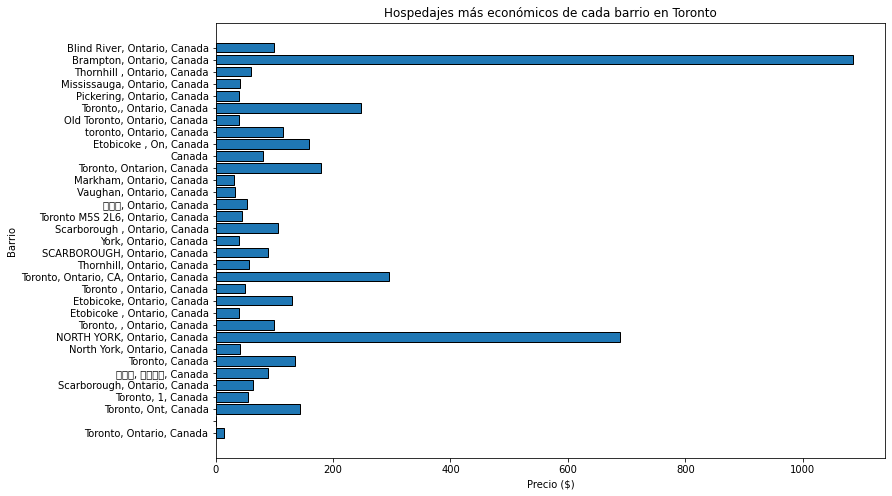

In [ ]:
#se listan los valores para los ejes horizontal y vertical del gráfico
barrios = list(precios_minimos.keys())
heights = list(precios_minimos.values())

#Tamaño del gráfico
plt.figure(figsize = (12, 8))

#Título del gráfico y de los ejes
plt.title("Hospedajes más económicos de cada barrio en Toronto")
plt.xlabel("Precio ($)")
plt.ylabel("Barrio")

#se crea el gráfico de barras horizontales con línea de contorno negra
plt.barh(barrios, heights, edgecolor="black")

Se observa que los hospedajes más economicos se encuentran en los barrios de: Markham, Vaughan, Etobicoke, Pickering y Mississauga. Una vez más, hay registros inconsistentes, como por ejemplo en el barrio sin nombre hay hospedajes que figuran a $0. También, otras publicaciones usan como barrio el nombre de la ciudad y tienen hospedajes más económicos, pero ese detalle hace difícil poder compararlas.

# Precios máximos

In [ ]:
precios_maximos = {}
for barrio, precios in resultado1.items():
        precios_maximos[barrio] = max(precios)

precios_maximos

{'': 13000.0,
 'Blind River, Ontario, Canada': 100.0,
 'Brampton, Ontario, Canada': 1086.0,
 'Canada': 81.0,
 'Etobicoke , On, Canada': 159.0,
 'Etobicoke , Ontario, Canada': 40.0,
 'Etobicoke, Ontario, Canada': 153.0,
 'Markham, Ontario, Canada': 1171.0,
 'Mississauga, Ontario, Canada': 366.0,
 'NORTH YORK, Ontario, Canada': 689.0,
 'North York, Ontario, Canada': 156.0,
 'Old Toronto, Ontario, Canada': 290.0,
 'Pickering, Ontario, Canada': 176.0,
 'SCARBOROUGH, Ontario, Canada': 89.0,
 'Scarborough , Ontario, Canada': 106.0,
 'Scarborough, Ontario, Canada': 152.0,
 'Thornhill , Ontario, Canada': 87.0,
 'Thornhill, Ontario, Canada': 150.0,
 'Toronto , Ontario, Canada': 225.0,
 'Toronto M5S 2L6, Ontario, Canada': 45.0,
 'Toronto, , Ontario, Canada': 99.0,
 'Toronto, 1, Canada': 356.0,
 'Toronto, Canada': 268.0,
 'Toronto, Ont, Canada': 149.0,
 'Toronto, Ontario, CA, Ontario, Canada': 296.0,
 'Toronto, Ontario, Canada': 13000.0,
 'Toronto, Ontarion, Canada': 180.0,
 'Toronto,, Ontario, C

# Gráfico precios máximos

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20262 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30465 missing from current font.
  font.set_

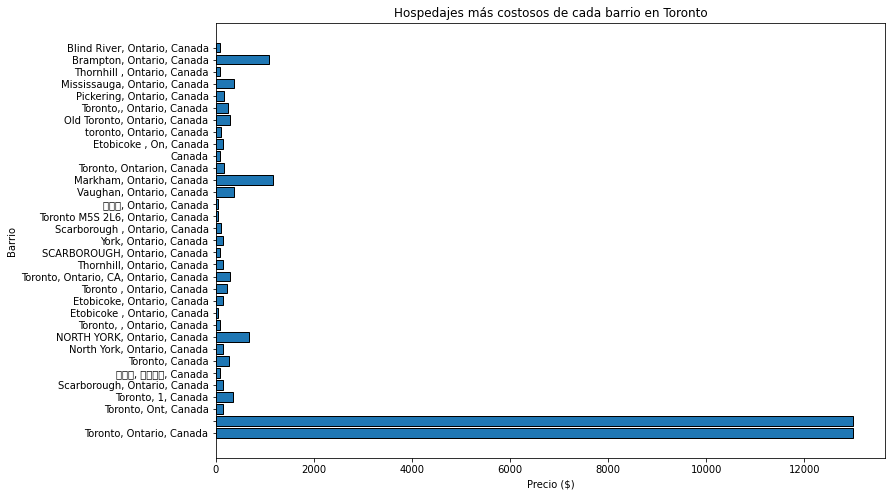

In [ ]:
barrios = list(precios_maximos.keys())
heights = list(precios_maximos.values())
plt.figure(figsize = (12, 8))
plt.title("Hospedajes más costosos de cada barrio en Toronto")
plt.xlabel("Precio ($)")
plt.ylabel("Barrio")
plt.barh(barrios, heights, edgecolor="black")
plt.yticks(barrios, labels=precios_minimos);

Los hospedajes más costosos por mucha diferencia figuran en el barrio sin nombre y en el barrio que lleva como nombre el de la ciudad, por lo cual es difícil saber a qué jurisdicción pertenecen. Por lo demás, se aprecian alquileres más costosos en los barrios de Markham, Brampton y North York.

# Conclusión final:
A modo de cierre agregar que algunos datos del archvo no serían los ideales para hacer el relevamiento, puesto que hay nombres de barrios que se repiten por estar en mayúsculas o minúsculas o por tener espacios en blanco que no corresponden, otros están escritos en caracteres orientales o directamente no aparece el nombre del barrio. Las herramientas adquiridas hasta el momento de la realización de este proyecto no permiten subsanar esos errores propios del archivo.
Dentro de los datos que sí están completos, se observa un rango de precios de hospedajes que va desde los 32 dolares hasta los 1171 dolares. Y los barrios que ofrecen precios de hospedaje más variados son: Markham, Vaughan, Mississauga y Old Toronto.

## Fuente: http://insideairbnb.com/get-the-data